# Gregors

## Context
Gregors is a B2B2C product and partners with lenders and background screening agencies to help
complete Income and Employment verification needs.
As part of this process the end user accesses either Gregors’s widget embedded in our client’s portal or an order form sent via email or SMS, where they do the following-

1. Search for their employer that they work at currently

2. When a user starts typing we use our internal database of employers; if the employer is
not found, the user is presented with google API results (first two rows) or manual entry
(last row), see screenshot below.

3. Once a user selects an employer, they can either see the Payroll provider login screen
(mapped employers) or see a list of payroll providers.

4. Once a user submits their credentials, they end in either Success or Error when user is
let go

| variable                                | sample                      | description                                                                                                  |   |   |
|-----------------------------------------|-----------------------------|--------------------------------------------------------------------------------------------------------------|---|---|
| Client Domain                           | A                           | Client Name                                                                                                  |   |   |
| User Phone Timezone                     | Unknown                     | User device time zone (Unknown: we failed to capture the timezone)                                           |   |   |
| Created At                              | 2023-03-27T20:44:47.283091Z | Date in which the order was created                                                                          |   |   |
| Email Clicks                            |                           0 | Clicks in email links                                                                                        |   |   |
| Email Opens                             |                           0 | Emails that were opened                                                                                      |   |   |
| Emails                                  |                           4 | Emails sent                                                                                                  |   |   |
| Expired                                 |                           1 | Number of expired orders                                                                                     |   |   |
| Order Funnel State                      | 2-Notification sent         | Order state                                                                                                  |   |   |
| Sms                                     |                           0 | SMS sent                                                                                                     |   |   |
| Sms Clicks                              |                           0 | SMS clicked                                                                                                  |   |   |
| Sms Opens                               |                           0 | SMS opened                                                                                                   |   |   |
| Platforms Order Group - Order → Manager | masked@order_manager.org    | Email of the order manager                                                                                   |   |   |
| Platforms Order Group - Order → Source  | internal                    |                                                                                                              |   |   |
| order_has_user_email                    |             TRUE            | If the user´s email was present in the order form (this is used to contact the user and ask them to verify). |   |   |
| order_has_user_phone                    |            FALSE            | If the user´s phone was present in the order form (this is used to contact the user and ask them to verify). |   |   |


The variable “Order Funnel State” tracks the following actions from users:
1. Created: order gets created
2. Notification sent : a notification is sent to the user that wants to verify their information
3. Notification opened: the notification is opened by the user
4. Notification click: the link within the email/message is clicked (this link opens our widget)
5. Widget loaded: the widget is loaded by the user
6. Employer selected: the user searches and selects an employer
7. Viewed provider login: user views the provider login page
8. Submitted login: user submits their credentials
9. Completed: user is able to successfully login to their employer and verify their information


## 1.1) Problem Statement
Our north star metric is “Conversion Rate” which is the ratio of users that successfully complete a verification (Order Funnel State = “9-Completed”).

**One of our clients reaches out complaining about a drop in CR and wants recomendations on how to improve it.**

## 1.2) Task
Analyze the following the dataset and:
* Figure out if conversion rate has in fact dropped and, if such, explain why it dropped
* Provide recommendations on how to improve conversion rate

## 1.3) Deliverables
Presentation with findings and recommendations
Proposal on how to prevent this from happening in the future


___

## Dataset

https://docs.google.com/spreadsheets/d/1appaNdbUMIMlA_j6bgnlCWURon7TODALquTU-UyGmoY/edit?usp=sharing


In [55]:
#autoreload
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import pytz

In [56]:
gregors5 = pd.read_excel('/Users/lolonastri/Desktop/POO_UCEMA/analisis_datos/teoria_y_practica/05-modelo-examen/gregors.xlsx')
gregors5.rename(columns={"Platforms Order Group - Order → Manager": "Manager", "Platforms Order Group - Order → Source": "Source"}, inplace=True)
gregors5

,Client Domain,User Phone Timezone,Created At,Email Clicks,Email Opens,Emails,Expired,Order Funnel State,Sms,Sms Clicks,Sms Opens,Manager,Source,order_has_user_email,order_has_user_phone
0,A,Unknown,2023-03-27T20:44:47.283091Z,0,0,4.0,1,2-Notification sent,0.0,0,0,masked@order_manager.org,internal,True,False
1,A,Unknown,2022-12-02T15:16:41.600287Z,0,3,4.0,1,3-Notification opened,0.0,0,0,masked@order_manager.org,internal,True,False
2,A,Unknown,2023-02-02T14:20:01.939494Z,1,1,1.0,0,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False
3,A,Unknown,2023-03-10T14:14:12.105397Z,3,4,4.0,1,5-Widget loaded,0.0,0,0,masked@order_manager.org,internal,True,False
4,A,Unknown,2023-03-03T22:02:48.992561Z,1,1,1.0,0,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,A,Unknown,2022-07-08T21:42:07.444375Z,2,4,4.0,1,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False
4086,A,Unknown,2022-07-12T17:01:04.057602Z,2,2,2.0,0,9-Completed,0.0,0,0,masked@order_manager.org,internal,True,False
4087,A,Unknown,2022-07-28T15:47:36.077158Z,1,1,1.0,0,9-Completed,0.0,0,0,masked@order_manager.org,internal,True,False
4088,A,Unknown,2022-07-01T14:32:52.854998Z,2,4,4.0,1,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False


___

# Pasos a seguir

##  1) Validacion de la data

A. Nulos, dtypes esperados, cantidad de columnas, cantidad de filas (Check n´s)

B. Inconsistencias: Semantica / linaje de la data --> Emails opens vs Clicks (chequear el funnel)

C. ...

## 2) Situación

A. ¿Hubo caída en la conversión de la empresa? Graficar mensualmente la tasa de conversion

B. Medir la conversion por sms vs por email 

C. Medir la conversion cuando no haya inconsistencias


## 3) Hipotesis

A. Timezone -> pensemos- stackoverflow - chatgpt/bard. Tenemos una maquina automatica que registra al horario de sus sistema operativo el envio de sms/emails y en realidad no esta teniendo en cuenta al usuario.

B. Ninguno podia abrir los sms --> ¿Funcionará este sistema? 


___

In [57]:
gregors5.tail(2).T

,4088,4089
Client Domain,A,A
User Phone Timezone,Unknown,Unknown
Created At,2022-07-01T14:32:52.854998Z,2022-07-08T14:33:23.025897Z
Email Clicks,2,1
Email Opens,4,4
Emails,4.0,4.0
Expired,1,1
Order Funnel State,8-Submitted login,6-Employer selected
Sms,0.0,0.0
Sms Clicks,0,0


___

##  1) Validacion de la data

A. Nulos, dtypes esperados, cantidad de columnas, cantidad de filas (Check n´s)

B. Inconsistencias: Semantica / linaje de la data --> Emails opens vs Clicks (chequear el funnel)

C. ...

___

# A) Nulos, dtypes esperados, cantidad de columnas, cantidad de filas (Check n´s)

In [58]:
gregors5.shape

(4090, 15)

In [59]:
(gregors5.isna().sum()/len(gregors5)).round(4) # porcentaje de nulos

Client Domain           0.0000
User Phone Timezone     0.0000
Created At              0.0000
Email Clicks            0.0000
Email Opens             0.0000
Emails                  0.0039
Expired                 0.0000
Order Funnel State      0.0000
Sms                     0.0039
Sms Clicks              0.0000
Sms Opens               0.0000
Manager                 0.0000
Source                  0.0000
order_has_user_email    0.0000
order_has_user_phone    0.0000
dtype: float64

##### → Missing treatment. Datos nulos. Observemos ¿Por qué están nulos? 

In [60]:
gregors5[gregors5["Emails"].isna()][["Order Funnel State","Email Opens","Sms Opens"]].value_counts()

Order Funnel State  Email Opens  Sms Opens
1-Created           0            0            16
Name: count, dtype: int64

In [61]:
gregors5[gregors5["Sms"].isna()][["Order Funnel State","Email Opens","Sms Opens"]].value_counts()

Order Funnel State  Email Opens  Sms Opens
1-Created           0            0            16
Name: count, dtype: int64

#### → Dado que los sms nulos y los emails nulos, son ordenes creadas que no contienen información, podemos eliminarlas

In [62]:
gregors5 = gregors5[~gregors5["Sms"].isna()]

In [63]:
gregors5.dropna(subset="Emails", inplace=True) # elimino los nulos de Emails

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_46044/954671966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gregors5.dropna(subset="Emails", inplace=True) # elimino los nulos de Emails


In [64]:
gregors5.isna().sum()

Client Domain           0
User Phone Timezone     0
Created At              0
Email Clicks            0
Email Opens             0
Emails                  0
Expired                 0
Order Funnel State      0
Sms                     0
Sms Clicks              0
Sms Opens               0
Manager                 0
Source                  0
order_has_user_email    0
order_has_user_phone    0
dtype: int64

In [65]:
gregors5.shape

(4074, 15)

___

### → Dtypes

In [66]:
gregors5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4074 entries, 0 to 4089
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Client Domain         4074 non-null   object 
 1   User Phone Timezone   4074 non-null   object 
 2   Created At            4074 non-null   object 
 3   Email Clicks          4074 non-null   int64  
 4   Email Opens           4074 non-null   int64  
 5   Emails                4074 non-null   float64
 6   Expired               4074 non-null   int64  
 7   Order Funnel State    4074 non-null   object 
 8   Sms                   4074 non-null   float64
 9   Sms Clicks            4074 non-null   int64  
 10  Sms Opens             4074 non-null   int64  
 11  Manager               4074 non-null   object 
 12  Source                4074 non-null   object 
 13  order_has_user_email  4074 non-null   bool   
 14  order_has_user_phone  4074 non-null   bool   
dtypes: bool(2), float64(2), in

In [67]:
gregors5["Client Domain"].value_counts()

Client Domain
A    4074
Name: count, dtype: int64

In [109]:
gregors5[["order_has_user_email", "order_has_user_phone"]].value_counts()

order_has_user_email  order_has_user_phone
False                 True                    2736
True                  True                    1099
                      False                    239
Name: count, dtype: int64

___

### → "User Phone Timezone"

In [68]:
gregors5["User Phone Timezone"].value_counts(normalize=True)

User Phone Timezone
CST        0.578547
EST        0.313451
Unknown    0.059401
PST        0.031419
MST        0.013255
AST        0.001964
UTC-10     0.001227
UTC-9      0.000736
Name: proportion, dtype: float64

#### → Vamos a transformar todos los horarios a UTC

In [69]:
horarios = {'EST':'UTC-5', 
            'CST':'UTC-6', 
            'PST':'UTC-8', 
            'MST':'UTC-7', 
            'AST':'UTC-4'}

gregors5["hrs-utc"] = gregors5["User Phone Timezone"].map(horarios)

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_46044/2665501198.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gregors5["hrs-utc"] = gregors5["User Phone Timezone"].map(horarios)


In [70]:
utc_hrs = {
    'UTC-5': 'America/New_York',
    'UTC-6': 'America/Chicago',
    'UTC-7': 'America/Denver',
    'UTC-8': 'America/Los_Angeles',
    'UTC-4': 'America/Puerto_Rico'
}

gregors5["hrs-pyz"] = gregors5["hrs-utc"].map(utc_hrs)

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_46044/297223405.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gregors5["hrs-pyz"] = gregors5["hrs-utc"].map(utc_hrs)


In [71]:
gregors5["hrs-pyz"].value_counts()

hrs-pyz
America/Chicago        2357
America/New_York       1277
America/Los_Angeles     128
America/Denver           54
America/Puerto_Rico       8
Name: count, dtype: int64

In [72]:
gregors5['Created At'] = pd.to_datetime(gregors5['Created At'])

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_46044/3095755086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gregors5['Created At'] = pd.to_datetime(gregors5['Created At'])


In [73]:
try:
    54/0
except Exception as e:
    print(e)

division by zero


In [74]:
import pytz
import pandas as pd

def convert_to_local_time(row):
    try:
        if pd.isnull(row['Created At']) or row['User Phone Timezone'] is None:
            return row['Created At']
        
        local_tz = pytz.timezone(row['hrs-pyz'])
        
        if row['Created At'].tzinfo is not None:
            local_time = row['Created At'].astimezone(local_tz)
        else:  
            utc_time = pytz.utc.localize(row['Created At'])
            local_time = utc_time.astimezone(local_tz)
        
        return local_time
    except Exception as e:
        print(f"Error en esta row {row['Created At']}, esta queriendo transformar a {row['hrs-pyz']}")
        return row['Created At']

gregors5['Created At'] = pd.to_datetime(gregors5['Created At'])


gregors5['local_time'] = gregors5.apply(convert_to_local_time, axis=1)


Error en esta row 2023-03-27 20:44:47.283091+00:00, esta queriendo transformar a nan
Error en esta row 2022-12-02 15:16:41.600287+00:00, esta queriendo transformar a nan
Error en esta row 2023-02-02 14:20:01.939494+00:00, esta queriendo transformar a nan
Error en esta row 2023-03-10 14:14:12.105397+00:00, esta queriendo transformar a nan
Error en esta row 2023-03-03 22:02:48.992561+00:00, esta queriendo transformar a nan
Error en esta row 2022-08-02 15:40:55.825565+00:00, esta queriendo transformar a nan
Error en esta row 2022-08-15 20:40:22.341309+00:00, esta queriendo transformar a nan
Error en esta row 2022-12-01 14:22:37.448971+00:00, esta queriendo transformar a nan
Error en esta row 2023-03-03 14:10:18.836659+00:00, esta queriendo transformar a nan
Error en esta row 2023-03-27 14:57:23.289756+00:00, esta queriendo transformar a nan
Error en esta row 2022-08-01 18:14:34.366618+00:00, esta queriendo transformar a nan
Error en esta row 2023-01-09 22:15:46.749926+00:00, esta queriend

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_46044/1625854705.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gregors5['Created At'] = pd.to_datetime(gregors5['Created At'])
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_46044/1625854705.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gregors5['local_time'] = gregors5.apply(convert_to_local_time, axis=1)


___

### Timezone preprocesado

##### Tenemos el horario que recibe el cliente la llamada o el sms. Pasos a seguir transforemos el la fecha al horario y luego del horario los transformaremos a si es de mañana, mediodia, noche o madrugada

In [75]:
"2023-03-27 20:44:47.283091+00:00"

'2023-03-27 20:44:47.283091+00:00'

In [76]:
gregors5['local_time']

0       2023-03-27 20:44:47.283091+00:00
1       2022-12-02 15:16:41.600287+00:00
2       2023-02-02 14:20:01.939494+00:00
3       2023-03-10 14:14:12.105397+00:00
4       2023-03-03 22:02:48.992561+00:00
                      ...               
4085    2022-07-08 21:42:07.444375+00:00
4086    2022-07-12 17:01:04.057602+00:00
4087    2022-07-28 15:47:36.077158+00:00
4088    2022-07-01 14:32:52.854998+00:00
4089    2022-07-08 14:33:23.025897+00:00
Name: local_time, Length: 4074, dtype: object

In [77]:
def chequear_horario(horario):
    horario = str(horario)
    return horario.split(" ")[1].split(":")[0]

gregors5['local_time_apply'] = gregors5['local_time'].apply(chequear_horario)

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_46044/641751673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gregors5['local_time_apply'] = gregors5['local_time'].apply(chequear_horario)


In [78]:
gregors5['local_time_apply'] = gregors5['local_time_apply'].astype(int)

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_46044/3505518411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gregors5['local_time_apply'] = gregors5['local_time_apply'].astype(int)


<Axes: xlabel='local_time_apply', ylabel='Count'>

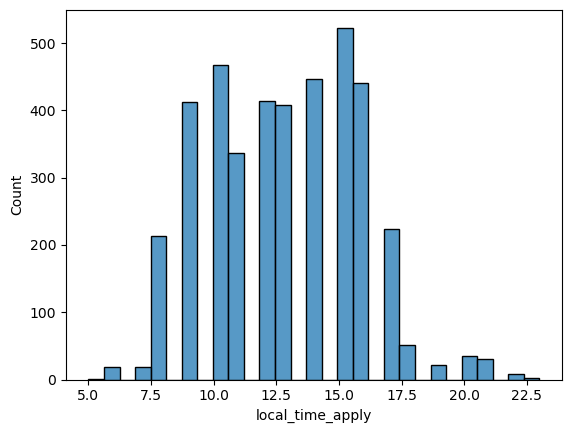

In [79]:
import seaborn as sns

sns.histplot(data=gregors5, x="local_time_apply")


In [80]:
def discretizar(x): 
    x = int(x)
    if x <= 7:
        return "madrugada"
    if 7 < x <= 12:
        return "mañana"
    if 12 < x <= 13:
        return "mediodía"
    if 13 < x <= 17:
        return "tarde"
    if x > 17:
        return "noche"
    

gregors5['timezone_discretizada'] = gregors5['local_time_apply'].apply(discretizar)

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_46044/1924821515.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gregors5['timezone_discretizada'] = gregors5['local_time_apply'].apply(discretizar)


___

# B) Semantica, inconsistencias, linaje

In [81]:
gregors5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4074 entries, 0 to 4089
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Client Domain          4074 non-null   object             
 1   User Phone Timezone    4074 non-null   object             
 2   Created At             4074 non-null   datetime64[ns, UTC]
 3   Email Clicks           4074 non-null   int64              
 4   Email Opens            4074 non-null   int64              
 5   Emails                 4074 non-null   float64            
 6   Expired                4074 non-null   int64              
 7   Order Funnel State     4074 non-null   object             
 8   Sms                    4074 non-null   float64            
 9   Sms Clicks             4074 non-null   int64              
 10  Sms Opens              4074 non-null   int64              
 11  Manager                4074 non-null   object             
 1

___

# TO-DO :
## Inconsistencias 

1. Me gustaria ver cuantos no cumplen con el funnel (que tienen un click sin un email) o no tienen ni telefono, ni email, o se da que no tienen order_has_user_email y le mandaron o mismo tiene un click

1. Decidir que hacer. borramos? 

## Conversion mensual

1. Necesitamos crear la columna año-mes

2. Reutilizar la columna conversion

3. agrupar y sumar, crear la columna tasa.

4. ¿Como queda ahora que sacamos los valores inconsistentes?

5. Que pasa si sacamos los horarios outliers? Mejora la conversion?

## Que otra hipotesis/consejo tenemos para la empresa?

___

## Chequeo de Hipotesis

### Horarios

Dado que esperamos que el cliente responda mejor a ciertos horarios nos diponemos a analizar la distribución de los mensjaes/emails por horarios y de la conversión por horarios y rangos de horarios.

<Axes: >

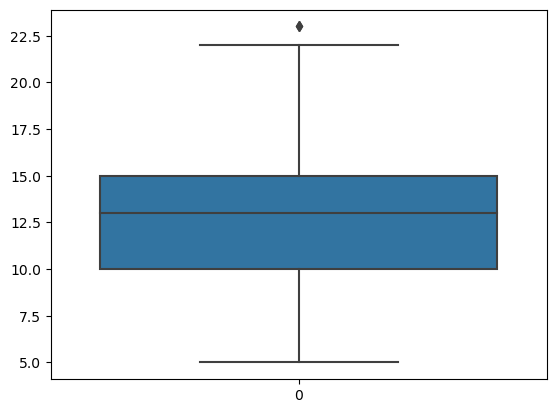

In [82]:
sns.boxplot(gregors5['local_time_apply'])

In [83]:
gregors5['local_time_apply'].sum()

52182

In [84]:
gregors5['local_time_apply'].value_counts().sort_index()

local_time_apply
5       1
6      19
7      19
8     213
9     413
10    468
11    336
12    414
13    408
14    447
15    523
16    440
17    224
18     51
19     22
20     35
21     30
22      9
23      2
Name: count, dtype: int64

#### Preprocesamos la variable tiempo. Ahora tenemos tanto los horarios de los sms o emails, ahora queda estudiar como es la conversión dado el horario.

In [85]:
gregors5["conversion"] = gregors5['Order Funnel State'] == "9-Completed"

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_46044/239625339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gregors5["conversion"] = gregors5['Order Funnel State'] == "9-Completed"


In [86]:
gregors5["conversion"] = gregors5["conversion"].astype(int)

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_46044/2432447905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gregors5["conversion"] = gregors5["conversion"].astype(int)


In [87]:
conv_df = gregors5.groupby('timezone_discretizada', as_index=True).agg(cant_conversion = ("conversion","sum"),
                                       totales = ("conversion","count") )

conv_df

,cant_conversion,totales
timezone_discretizada,,
madrugada,7,39
mañana,304,1844
mediodía,67,408
noche,25,149
tarde,224,1634


In [88]:
conv_df["%_conversion"] = conv_df["cant_conversion"]/conv_df["totales"]

In [89]:
conv_df

,cant_conversion,totales,%_conversion
timezone_discretizada,,,
madrugada,7,39,0.179487
mañana,304,1844,0.164859
mediodía,67,408,0.164216
noche,25,149,0.167785
tarde,224,1634,0.137087


In [90]:
conv_df_time = gregors5.groupby('local_time_apply', as_index=True).agg(cant_conversion = ("conversion","sum"),
                                       totales = ("conversion","count") )

conv_df_time["%_conversion"] = conv_df_time["cant_conversion"]/conv_df_time["totales"]
conv_df_time

,cant_conversion,totales,%_conversion
local_time_apply,,,
5,0,1,0.000000
6,5,19,0.263158
7,2,19,0.105263
8,37,213,0.173709
9,72,413,0.174334
10,74,468,0.158120
11,48,336,0.142857
12,73,414,0.176329
13,67,408,0.164216


___

# Hipótesis 2: Expired

#### A mayor cantidad de expired, mayor es la probabilidad de no conversión.

In [91]:
list(gregors5)

['Client Domain',
 'User Phone Timezone',
 'Created At',
 'Email Clicks',
 'Email Opens',
 'Emails',
 'Expired',
 'Order Funnel State',
 'Sms',
 'Sms Clicks',
 'Sms Opens',
 'Manager',
 'Source',
 'order_has_user_email',
 'order_has_user_phone',
 'hrs-utc',
 'hrs-pyz',
 'local_time',
 'local_time_apply',
 'timezone_discretizada',
 'conversion']

In [92]:
gregors5.groupby("conversion").agg(cantidad_expired =("Expired","sum"),
                            media_expired =("Expired","mean")) 

,cantidad_expired,media_expired
conversion,,
0,3011,0.873513
1,38,0.060606


In [93]:
df_exp = gregors5.groupby("Expired").agg(cant_conv =("conversion","sum"),
                                                     total_de_muestra= ("conversion","count"),
                         tasa_conv =("conversion","mean")) 

df_exp

,cant_conv,total_de_muestra,tasa_conv
Expired,,,
0,598,1185,0.504641
1,22,2761,0.007968
2,5,104,0.048077
3,2,16,0.125000
4,0,8,0.000000


#### Me pregunto. ¿Cómo quedara tasa de conversion global o mes a mes, sacando aquellos que tienen expired == 4 y tmb podriamos sacar == 3)

In [94]:
df_exp.cant_conv.sum()

627

In [95]:
598/627

0.9537480063795853

#### Recomendacion a la empresa: Si te cobran cada vez que mandas un sms/email a un cliente ¿Vale la pena mandarle una vez que expired? dado que el 95% de los que convirtieron nunca tuvieron valor mayor a 0 en expired

___

# Conversión definido como llegar hasta lo último del funnel

### 1) Análisis de tasa de conversión por timezone
### 2) Conversión por horarios del día
### 3) Conversión por horarios del día por timezone
### 4) Relación entre emails clicks o sms clicks y conversión
### 5) Relación entre gente que tiene email y conversión

____

# 1) Análisis de tasa de conversión por timezone

___

# 2) Conversión por horarios del día

In [96]:
conv_por_horarios_del_dia = gregors5.groupby("local_time_apply").agg(cant_conv =("conversion","sum"),
                                                        total_de_muestra= ("conversion","count"),
                            tasa_conv =("conversion","mean")).reset_index()

conv_por_horarios_del_dia

,local_time_apply,cant_conv,total_de_muestra,tasa_conv
0,5,0,1,0.000000
1,6,5,19,0.263158
2,7,2,19,0.105263
3,8,37,213,0.173709
4,9,72,413,0.174334
5,10,74,468,0.158120
6,11,48,336,0.142857
7,12,73,414,0.176329
8,13,67,408,0.164216
9,14,58,447,0.129754


<Axes: xlabel='local_time_apply', ylabel='tasa_conv'>

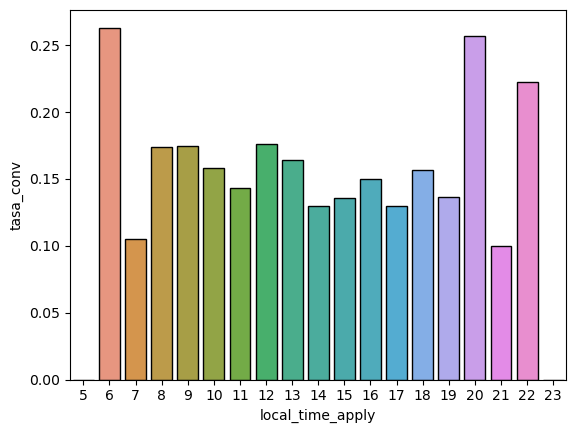

In [117]:
sns.barplot(data=conv_por_horarios_del_dia, x="local_time_apply", y="tasa_conv", edgecolor="black")

____

# 3) Conversión por horarios del día por timezone

In [98]:
solo_horas = gregors5["Created At"].dt.hour
solo_horas

0       20
1       15
2       14
3       14
4       22
        ..
4085    21
4086    17
4087    15
4088    14
4089    14
Name: Created At, Length: 4074, dtype: int32

In [99]:
gregors5.groupby(["hrs-pyz","local_time_apply"]).agg(cant_conv =("conversion","sum"),
                                                        total_de_muestra= ("conversion","count"),
                            tasa_conv =("conversion","mean")).reset_index()


,hrs-pyz,local_time_apply,cant_conv,total_de_muestra,tasa_conv
0,America/Chicago,7,0,2,0.000000
1,America/Chicago,8,35,191,0.183246
2,America/Chicago,9,40,281,0.142349
3,America/Chicago,10,32,299,0.107023
4,America/Chicago,11,30,178,0.168539
5,America/Chicago,12,47,251,0.187251
6,America/Chicago,13,35,231,0.151515
7,America/Chicago,14,34,248,0.137097
8,America/Chicago,15,40,338,0.118343
9,America/Chicago,16,37,282,0.131206


____

# 4) Relación entre emails clicks o sms clicks y conversión

In [111]:
relacion_emails_clicks_conversion = gregors5.groupby("Email Clicks").agg(cant_conv =("conversion","sum"),
                                                        total_de_muestra= ("conversion","count"),
                                                        tasa_conv =("conversion","mean"))
relacion_emails_clicks_conversion



,cant_conv,total_de_muestra,tasa_conv
Email Clicks,,,
0,379,3226,0.117483
1,231,620,0.372581
2,14,152,0.092105
3,3,56,0.053571
4,0,20,0.000000


<Axes: xlabel='Email Clicks', ylabel='tasa_conv'>

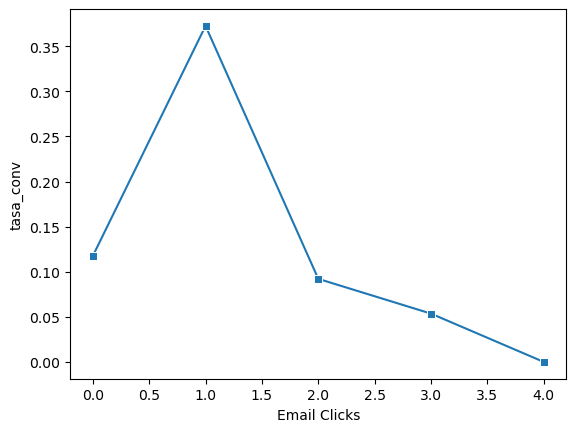

In [113]:
sns.lineplot(data=relacion_emails_clicks_conversion, x="Email Clicks", y="tasa_conv", marker="s")

In [101]:
relacion_sms_clicks_conversion = gregors5.groupby("Sms Clicks").agg(cant_conv =("conversion","sum"),
                                                        total_de_muestra= ("conversion","count"),
                                                        tasa_conv =("conversion","mean"))
relacion_sms_clicks_conversion



,cant_conv,total_de_muestra,tasa_conv
Sms Clicks,,,
0,131,1621,0.080814
1,496,2453,0.202201


___

# 5) Relación entre gente que tiene email y conversión

In [102]:
relacion_mail_conversion = gregors5.groupby("Emails").agg(cant_conv =("conversion","sum"),
                                                        total_de_muestra= ("conversion","count"),
                                                        tasa_conv =("conversion","mean"))
relacion_mail_conversion

,cant_conv,total_de_muestra,tasa_conv
Emails,,,
0.0,315,2736,0.115132
1.0,281,470,0.597872
2.0,20,42,0.476190
3.0,7,22,0.318182
4.0,4,804,0.004975
